# Stock valuation with comaprable companies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
analysis = pd.read_csv('/content/TESLA_price_compared.csv')

In [ ]:
analysis

,Company,Price,Market Cap,EV,Sales,EBITA,EBIT,Earnings,EV/Sales,EV/EBITA,EV/EBIT,P/E,Unnamed: 12
0,GM,$39.70,"$57,884,506,712","$151,561,506,712","$132,101,000,000","$22,369,000,000","$10,604,000,000","$7,723,000,000",1.15,6.78,14.29,7.50,NaN
1,Ford,$15.88,"$63,841,364,020","$63,841,364,020","$43,462,000,000","-$243,671,000","-$55,215,000","-$679,314,000",1.47,NaN,NaN,NaN,NaN
2,Toyota,$156.46,"$21,063,441,037","$166,828,347,063","$233,196,302,815","$40,086,350,654","$26,318,282,454","$19,636,336,794",0.72,4.16,6.34,1.07,NaN
3,Volkswagen,$146.30,"$87,658,222,807","$152,670,592,437","$251,493,094,200.00","$53,768,209,000.00","$25,811,149,200.00","$18,221,169,800.00",0.61,2.84,5.91,4.81,NaN
4,Daimler,$14.55,"$86,166,066","$68,089,166,066","$138,185,000,000.00","$23,542,000,000.00","$17,004,000,000.00","$21,715,000,000.00",0.49,2.89,4.00,0.00,NaN
5,BMW,$76.09,"$50,116,573,227","$65,545,624,800","$122,241,626,700.00","$30,164,196,100.00","$22,808,078,800.00","$17,848,797,100.00",0.54,2.17,2.87,2.81,NaN
6,Honda,$27.05,"$49,558,844,602","$83,583,498,634","$108,060,730,823.95","$11,966,892,450.81","$7,430,742,661.81","$4,627,945,770.35",0.77,6.98,11.25,10.71,NaN
7,Tesla,$890.00,"$929,595,210,000","$936,260,210,000","$67,166,000,000.00","$14,330,000,000.00","$10,919,000,000.00","$9,508,000,000.00",13.94,65.34,85.75,97.77,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,4.30,7.45,4.48,NaN


From the comparison based on the performance of the other compaines, it is concluded that Tesla stock prices are highly overvalued and hence volatile.

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('/content/TESLA_stock_price_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60,693):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
 X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
 regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
 regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
 regressor.add(LSTM(units = 50, return_sequences= True))
 regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
 regressor.add(LSTM(units = 50, return_sequences= True))
 regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
 regressor.add(LSTM(units = 50, return_sequences= False))
 regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer= 'adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)  

Epoch 1/150
20/20 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 2/150
20/20 [==============================] - 0s 13ms/step - loss: 0.0024
Epoch 3/150
20/20 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 4/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 5/150
20/20 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 6/150
20/20 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 7/150
20/20 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 8/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 9/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 10/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0027
Epoch 11/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 12/150
20/20 [==============================] - 0s 14ms/step - loss: 0.0020
Epoch 13/150
20/20 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of NOV 2021

In [ ]:
dataset_test = pd.read_csv('/content/TESLA_stock_price_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of  Nov 2021

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 102):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

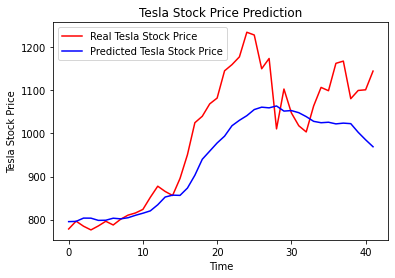

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()